In [21]:
import numpy as np
import requests
import pandas as pd
import datetime
import json

In [22]:
def get_stock_month(stockNo, date):
    url = "http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date={}&stockNo={}".format(date.strftime('%Y%m%d'), stockNo)
    data = requests.get(url).text
    stock = json.loads(data)
    return pd.DataFrame(stock['data'], columns=stock['fields'])

In [23]:
getmonth = datetime.datetime.strptime("2021-10-01", "%Y-%m-%d")
tsmc = get_stock_month(2330, getmonth)

In [24]:
tsmc

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,110/10/01,"39,006,124","22,368,447,571",579.00,579.00,571.00,574.00,-6.00,"78,088"
1,110/10/04,"22,288,138","12,741,914,919",574.00,575.00,569.00,572.00,-2.00,"42,147"
2,110/10/05,"36,063,650","20,406,526,124",562.00,572.00,560.00,572.00,0.00,"56,678"
3,110/10/06,"33,989,379","19,345,468,774",573.00,574.00,565.00,571.00,-1.00,"53,606"
4,110/10/07,"28,480,400","16,458,019,782",575.00,582.00,572.00,580.00,+9.00,"23,304"
5,110/10/08,"22,601,904","13,051,944,932",582.00,583.00,573.00,575.00,-5.00,"24,157"
6,110/10/12,"27,126,088","15,455,194,493",570.00,575.00,564.00,575.00,0.00,"32,210"
7,110/10/13,"19,267,437","11,006,807,040",572.00,575.00,570.00,571.00,-4.00,"18,050"
8,110/10/14,"14,270,641","8,213,170,376",579.00,579.00,573.00,573.00,+2.00,"14,814"
9,110/10/15,"55,305,252","32,878,638,999",592.00,600.00,586.00,600.00,+27.00,"61,088"


In [15]:
import time
from dateutil import rrule
import matplotlib.pyplot as plt

In [16]:
def year_stock(stockNo, startdate):
    b_month = datetime.date(*[int(x) for x in startdate.split('-')])
    now = datetime.datetime.now().strftime("%Y-%m-%d")
    e_month = datetime.date(*[int(x) for x in now.split('-')])
    result = pd.DataFrame()
            #依照月份數跑幾次
    for dt in rrule.rrule(rrule.MONTHLY, dtstart=b_month, until=e_month):
        result = pd.concat([result, get_stock_month(stockNo, dt)], ignore_index=True)
        time.sleep(3)
    return result

In [17]:
yeardata = year_stock(2330, '2021-01-01')

In [18]:
yeardata.set_index("日期", inplace=True)

Text(0, 0.5, 'money')

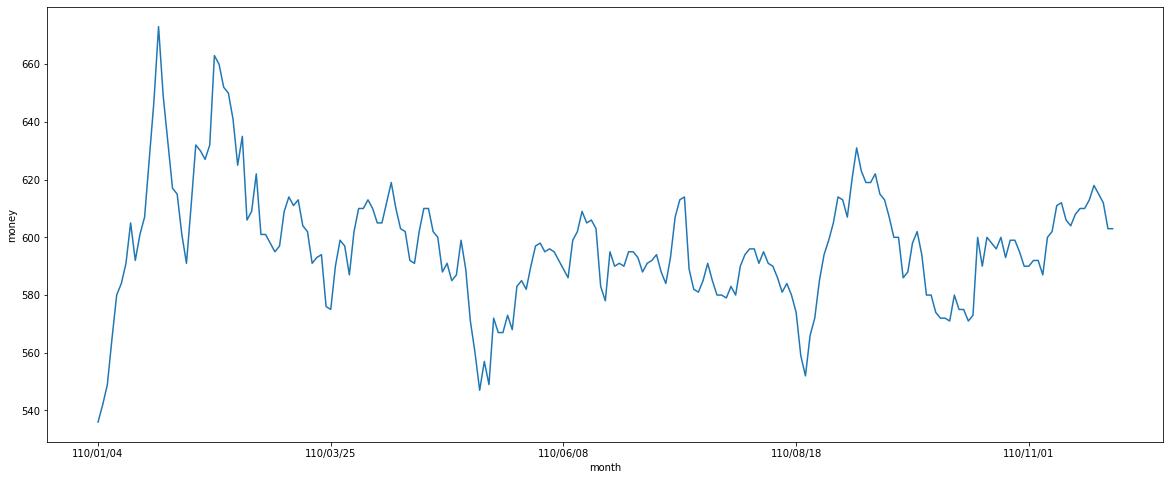

In [19]:
yeardata['收盤價'] = yeardata['收盤價'].astype(float) # astype 轉換
yeardata.loc[:]['收盤價'].plot(figsize=(20,8)) # figsize 改變圖大小(寬,高) 英吋
plt.xlabel('month')
plt.ylabel('money')

In [20]:
yeardata.to_csv('tsmc.csv', encoding='utf_8_sig') #匯出資料